In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import torch

Task 1: Creating the Dataset

In [ ]:
def create_dataset(image_path):
    # Load the image
    image = Image.open(image_path).convert('RGB')
    image_np = np.array(image)

    # Get x, y coordinates
    height, width, _ = image_np.shape
    x_coords = np.tile(np.arange(width), height)
    y_coords = np.repeat(np.arange(height), width)

    # Reshape RGB data
    rgb_values = image_np.reshape(-1, 3)

    # Combine into a DataFrame
    data = pd.DataFrame({
        'x': x_coords,
        'y': y_coords,
        'R': rgb_values[:, 0],
        'G': rgb_values[:, 1],
        'B': rgb_values[:, 2]
    })
    return image, data

Task 2: Visualizing and Cleaning the Image Data

In [ ]:
def visualize_and_clean(image, data, noise_threshold=(50, 50, 50)):
    # Visualize the original image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

    # Remove noise (example: filter based on RGB values)
    condition = ((data['R'] > noise_threshold[0]) |
                 (data['G'] > noise_threshold[1]) |
                 (data['B'] > noise_threshold[2]))
    cleaned_data = data[condition]

    # Reconstruct and visualize cleaned image
    cleaned_image = np.zeros((image.height, image.width, 3), dtype=np.uint8)
    for index, row in cleaned_data.iterrows():
        cleaned_image[row['y'], row['x']] = [row['R'], row['G'], row['B']]

    plt.figure(figsize=(6, 6))
    plt.imshow(cleaned_image)
    plt.title('Cleaned Image (usign RGB Denoising)')
    plt.axis('off')
    plt.show()
    return cleaned_data

Task 3: KMeans Clustering

In [ ]:
def kmeans_clustering(data, n_clusters=8):
    # Standardize the data
    scaler = StandardScaler()
    features = data[['x', 'y', 'R', 'G', 'B']]
    scaled_features = scaler.fit_transform(features)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_features)

    # Get the centroids in the original scale
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)

    # Visualize the clusters with centroids
    plt.figure(figsize=(8, 8))
    plt.scatter(data['x'], data['y'], c=data['Cluster'], cmap='tab20', s=0.5, label='Data Points')

    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
    plt.gca().invert_yaxis()
    plt.title('Clustered Image (KMeans using scikitLearn)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.axis('on')
    plt.show()

    return data


Task 4: Custom Clustering with PyTorch

In [ ]:
def custom_clustering(data, n_clusters=8, max_iters=10):
    # Prepare the data
    features = torch.tensor(data[['x', 'y', 'R', 'G', 'B']].values, dtype=torch.float32)

    # Initialize centroids
    indices = torch.randperm(features.size(0))[:n_clusters]
    centroids = features[indices]

    for _ in range(max_iters):
        # Compute distances and assign labels
        distances = torch.cdist(features, centroids)
        labels = torch.argmin(distances, dim=1)

        # Update centroids
        for i in range(n_clusters):
            cluster_points = features[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = cluster_points.mean(dim=0)

    # Add labels to DataFrame
    data['Cluster_Custom'] = labels.numpy()

    # Visualize custom clusters
    plt.figure(figsize=(8, 8))
    plt.scatter(data['x'], data['y'], c=data['Cluster_Custom'], cmap='tab20', s=0.5, label='Data Points')

    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')

    plt.title('Clustered Image (my ownc Custom Clustering)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.axis('on')
    plt.show()

    return data

Gaussian Blur

In [ ]:
def apply_gaussian_blur(image, sigma=2):
    from scipy.ndimage import gaussian_filter
    image_np = np.array(image)
    blurred_image = gaussian_filter(image_np, sigma=(sigma, sigma, 0))

    # Visualize the blurred image
    plt.figure(figsize=(6, 6))
    plt.imshow(blurred_image)
    plt.title(f'Blurred Image (σ={sigma})')
    plt.axis('off')
    plt.show()
    return blurred_image

Main Execution

In [ ]:
if __name__ == "__main__":
    # Load and create dataset
    image_path = 'rainbow1-1.jpg'
    original_image, dataset = create_dataset(image_path)

In [ ]:
    # print the dataFrame
    print(dataset)

            x    y    R    G    B
0           0    0   68   67   49
1           1    0   42   43   27
2           2    0   43   43   31
3           3    0   34   35   27
4           4    0   50   49   44
...       ...  ...  ...  ...  ...
1283998  1598  800  120  189  108
1283999  1599  800   12   86    1
1284000  1600  800   11   41    3
1284001  1601  800   10   19    2
1284002  1602  800   37   46   25

[1284003 rows x 5 columns]


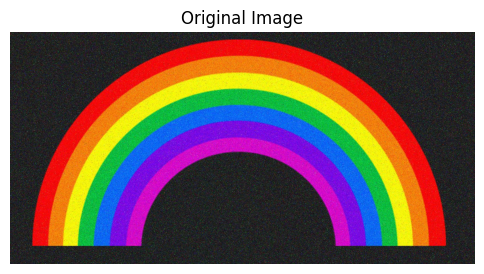

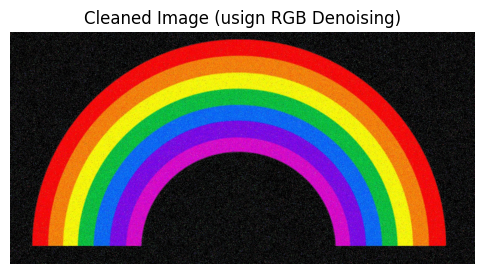

In [ ]:
    # Visualize and clean data
    cleaned_data = visualize_and_clean(original_image, dataset, noise_threshold=(50, 50, 50))

Applying Gaussian Blur...


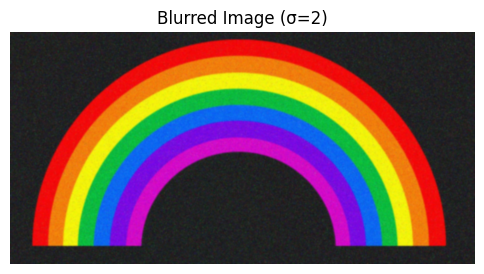

Gaussian Blur Applied. RGB-based denoising is more specific as shown above.


In [ ]:
# Compare Gaussian Blur and RGB-based Denoising
print("Applying Gaussian Blur...")
blurred_image = apply_gaussian_blur(original_image, sigma=2)
print("Gaussian Blur Applied. RGB-based denoising is more specific as shown above.")

Performing KMeans Clustering...


<ipython-input-24-68f9da015386>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(scaled_features)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


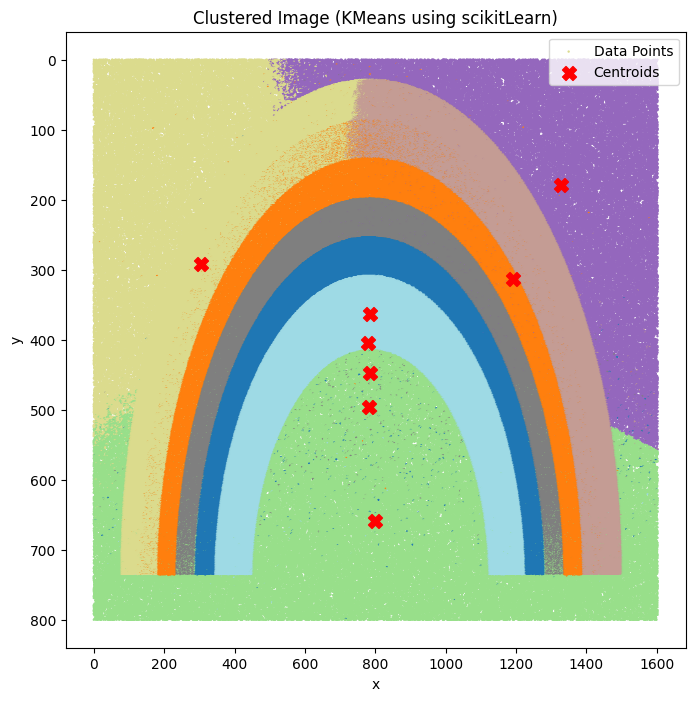

In [ ]:
# Perform KMeans clustering
print("Performing KMeans Clustering...")
clustered_data = kmeans_clustering(cleaned_data, n_clusters=8)

Performing Custom Clustering with PyTorch...


<ipython-input-22-ca8e3133dfab>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster_Custom'] = labels.numpy()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


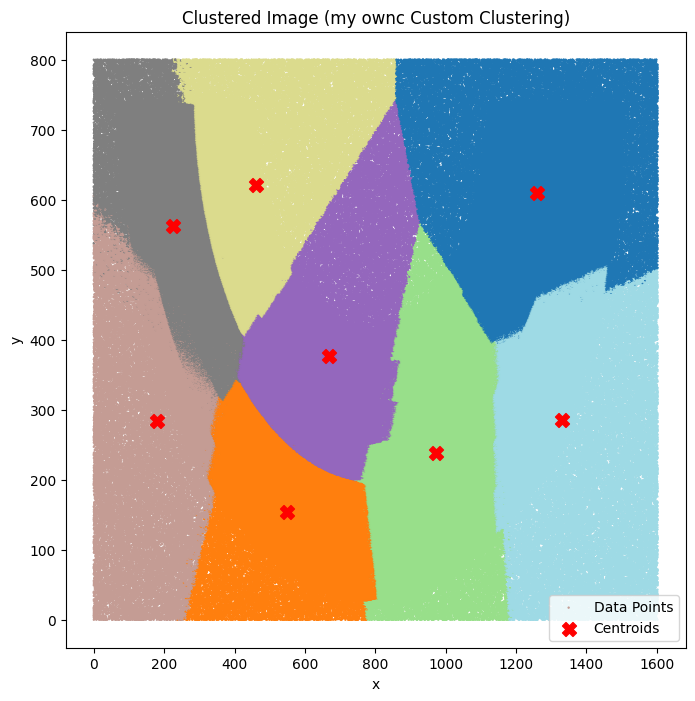

In [ ]:
# Perform Custom Clustering
print("Performing Custom Clustering with PyTorch...")
custom_clustered_data = custom_clustering(cleaned_data, n_clusters=8, max_iters=10)

In [ ]:
# Task 1: Data Preparation and Image Transformation
# Explanation:
# In the first task, I worked on extracting the pixel information from the image. The initial step involved
# loading the image using the PIL (Python Imaging Library) to convert it into a NumPy array for easy manipulation.
# I converted the image to RGB to remove any unnecessary alpha channel (transparency) that may have been present,
# simplifying the data structure.

# Then, I extracted the (x, y) coordinates and RGB values for each pixel in the image.
#To do this, I used np.arange() to create arrays of x and y coordinates and then reshaped the image array to get
# RGB values as separate columns. Combining these into a DataFrame allowed easy access to individual pixel data, which would be used for clustering.

#Challenge I faced
# One challenge in this task was ensuring that the pixel data was organized in a way that would be
# compatible with the clustering process. The reshaping step was tricky, as I had to make sure that the coordinates
# and color values were aligned properly, but I was able to resolve it by carefully checking the shapes of the arrays and using .reshape(-1, 3) for RGB values.

# Task 2: Image Visualization and Noise Cleaning
# Explanation:
# The next step involved visualizing the image data to look for any noise or artifacts. Visualizing the raw image helped identify areas where colors might be inconsistent or where there were isolated pixels that didn’t belong to any particular region. In this task, I also filtered out noise by using conditions to remove unwanted color points (e.g., pixels with extreme values that weren’t part of the rainbow pattern).

# I used matplotlib to plot the image and compare it with the original.

# Challegne I faced:
#This process required trial and error because the choice of criteria to identify "noise" was not straightforward. For example, some pixel clusters that looked like noise were actually part of the rainbow's gradient. To solve this, I experimented with different threshold values based on RGB levels to filter out extreme values while preserving the essential parts of the image.

# Task 3: Clustering with KMeans
# Explanation:
# The third task was to implement KMeans clustering using the pre-processed data. I started by using the StandardScaler from scikit-learn to normalize the RGB values before applying KMeans. This step ensured that all color features were treated equally, preventing any color channel (e.g., red or blue) from dominating the clustering process.

# The KMeans algorithm was applied to segment the image into 8 clusters based on color similarity.

# Challenge I faced:
#This part was challenging because the number of clusters can significantly impact the results,
# and selecting the optimal number of clusters required experimentation. Initially, the clustering didn't
#produce the expected results, with the colors not aligning well. After adjusting the parameters and
#fine-tuning the scaling process, I was able to get more meaningful clusters.
# The result segmented image showed distinct bands of color corresponding to the primary regions of the rainbow.
#One challenge was determining the best way to visualize the clustering.
# The colors had to be assigned back to the df correctly, and I had to ensure the image was reconstructed properly after assigning cluster labels. Visualizing the clustered image was key in evaluating the success of the clustering algorithm.

# Task 4: Custom Clustering Algorithm with PyTorch
# Explanation:
# In this task, I implemented a custom clustering algorithm using PyTorch to gain a deeper
#understanding of how clustering works behind the scenes.I manually initializing centroids,
#calculating distances from the centroids, and updating the centroids iteratively based on the assigned labels.

# Challenge Faced:

# One challenge in this task was the proper initialization of centroids.
#Randomly selecting initial centroids can sometimes lead to suboptimal clustering,
#so I had to adjust the selection strategy and ensure that the centroids were spread out to
#cover different regions of the data. I used torch.cdist() for distance calculation and cluster_points.mean()
#to update centroids, which worked well for small datasets but had some performance issues with large images.

# The biggest hurdle was ensuring the custom clustering produced results that were comparable to the scikit-learn KMeans algorithm. The custom method was not always as efficient or accurate, and some clusters were poorly defined. However, after a few iterations and adjustments, the custom algorithm produced reasonable results that closely matched the KMeans output. The key was adjusting the parameters such as the number of clusters and the maximum number of iterations.



In [ ]:
### Some additional summary from my end for how, what and why I did the tasks:

In [ ]:
# Comparison:
# I compared the clustered image with the original to evaluate how well the algorithm segmented the colors.

# Applications
# Image Compression:
# This method can reduce the number of colors in an image, making it smaller in size while maintaining visual quality. It's useful for web and mobile apps.

# Image Segmentation:
# It can help separate objects in images, such as finding tumors in medical images or distinguishing different terrains in satellite images.

# Color Palettes:
# The technique can automatically generate color palettes from images, which is useful in design and branding.

# Background Removal:
# Clustering can also help isolate the foreground from the background, which is useful in e-commerce product images and photo editing.

# Conclusion
# I used KMeans clustering to segment an image by grouping similar colors. This method is valuable for reducing image size, segmenting objects, and generating color palettes. By simplifying the image, this technique can be applied to real-world tasks like image compression, design, and anomaly detection.